# Modelos

## Overfitting e Underfitting

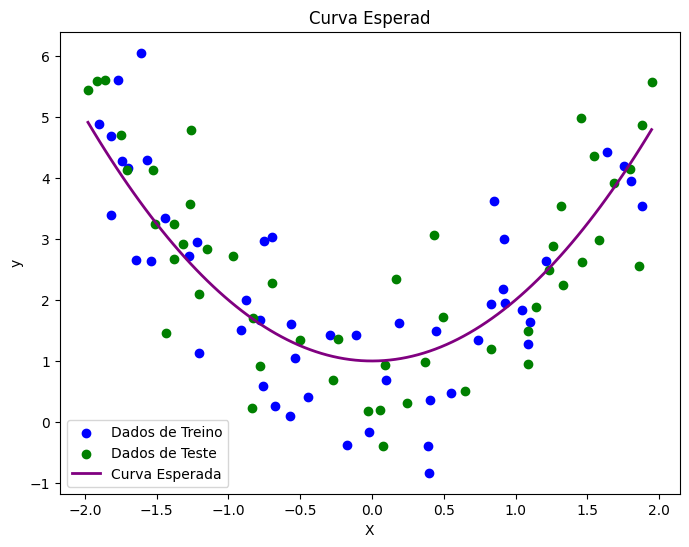

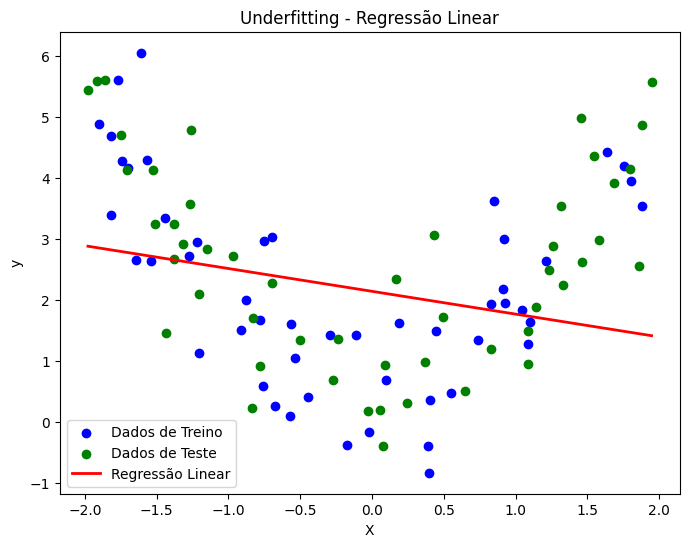

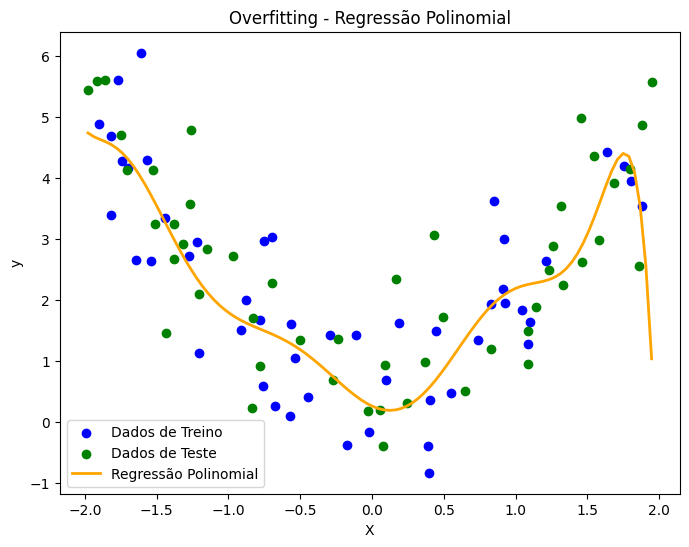

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerar um conjunto de dados quadrático
np.random.seed(42)
X = np.random.rand(100, 1) * 4 - 2
y =  X**2 + 1 + np.random.normal(0, 1, size=X.shape)  # Relação quadrática com ruído

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Ajustar uma regressão linear (underfitting)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

# Ajustar uma regressão polinomial de grau 10 (overfitting)
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)

# Plotar os resultados - Regressão Linear
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_lin = lin_reg.predict(X_range)


# Plotar os resultados - Curva Esperada
y_true = X_range**2+ 1  # Curva quadrática verdadeira

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Dados de Treino", color="blue")
plt.scatter(X_test, y_test, label="Dados de Teste", color="green")
plt.plot(X_range, y_true, label="Curva Esperada", color="purple", linewidth=2)
plt.title("Curva Esperad")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Dados de Treino", color="blue")
plt.scatter(X_test, y_test, label="Dados de Teste", color="green")
plt.plot(X_range, y_range_lin, label="Regressão Linear", color="red", linewidth=2)
plt.legend()
plt.title("Underfitting - Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Plotar os resultados - Regressão Polinomial
X_range_poly = poly_features.transform(X_range)
y_range_poly = poly_reg.predict(X_range_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Dados de Treino", color="blue")
plt.scatter(X_test, y_test, label="Dados de Teste", color="green")
plt.plot(X_range, y_range_poly, label="Regressão Polinomial", color="orange", linewidth=2)
plt.legend()
plt.title("Overfitting - Regressão Polinomial")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

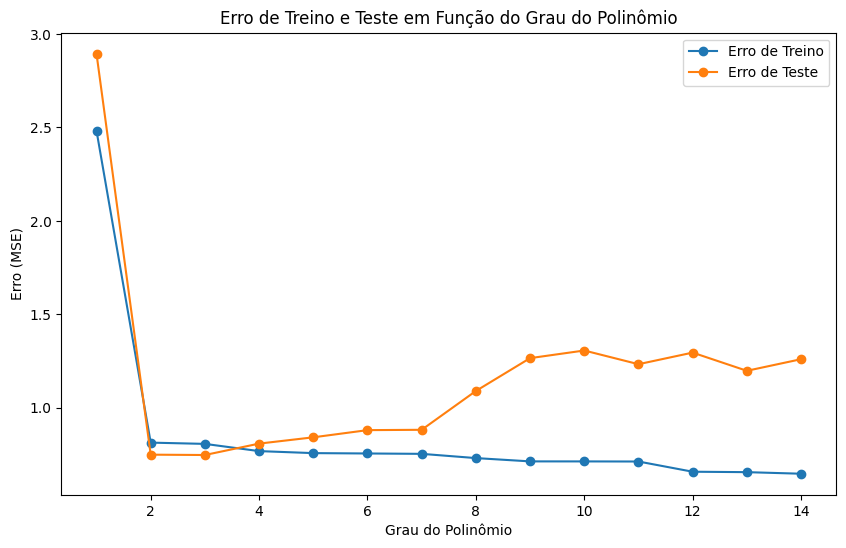

In [118]:
# Testar diferentes graus de polinômios e plotar os erros de treino e teste
degrees = range(1, 15)
train_errors = []
test_errors = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transformar os dados de treino e teste
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Treinar o modelo
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    # Previsões
    y_train_pred = poly_reg.predict(X_train_poly)
    y_test_pred = poly_reg.predict(X_test_poly)
    
    # Calcular os erros (MSE)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plotar o erro de treino e teste em função do grau do polinômio
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label="Erro de Treino", marker='o')
plt.plot(degrees, test_errors, label="Erro de Teste", marker='o')
plt.title("Erro de Treino e Teste em Função do Grau do Polinômio")
plt.xlabel("Grau do Polinômio")
plt.ylabel("Erro (MSE)")
plt.legend()
plt.show()


## Por que precisamos dividir em treino, calibração e teste?

A divisão dos dados em **treino**, **calibração** e **teste** é fundamental em Machine Learning para garantir que o modelo seja ajustado, calibrado e avaliado corretamente. Abaixo explicamos o papel de cada conjunto de dados usando um exemplo onde \( X \) está no intervalo de -1 a 1.

### 1. Conjunto de Treinamento (Treino)
- **Função**: O conjunto de treino é utilizado para **ajustar os parâmetros do modelo**. Aqui, o modelo "aprende" a partir dos dados, identificando padrões para fazer previsões.
  
  No nosso exemplo, o conjunto de treino vai observar valores de \( X \) entre -1 e 1 e ajustará o modelo com base na função:

  $$ y = X^2 + 1 + \text{erro} $$

- **Risco**: Se o modelo não for complexo o suficiente, ele pode resultar em **underfitting**, pois não capturaria a complexidade real da função. Por outro lado, se o modelo for muito complexo, pode memorizar os dados de treino, resultando em **overfitting**.

### 2. Conjunto de Calibração (Validação ou Calibração)
- **Função**: O conjunto de calibração é usado para **ajustar hiperparâmetros** do modelo, como o grau do polinômio ou outros parâmetros que afetam a complexidade do modelo.
  
  Usando nosso exemplo, suponha que ajustemos um polinômio com diferentes graus (1, 2, 3, ...). A calibração nos ajuda a identificar o grau adequado que balanceia o ajuste para os dados sem overfitting.

- **Risco**: Sem o conjunto de calibração, poderíamos ajustar o modelo com base exclusivamente no desempenho nos dados de treino, escolhendo um grau de polinômio muito elevado, resultando em **overfitting**. O conjunto de calibração ajuda a prevenir esse comportamento.

### 3. Conjunto de Teste
- **Função**: O conjunto de teste é utilizado para **avaliar a performance final** do modelo, sem influenciar o processo de ajuste.
  
  No nosso exemplo, após treinar e calibrar o modelo, o conjunto de teste verifica se o modelo consegue prever corretamente novos valores de $X$ entre -1 e 1. Esse conjunto simula como o modelo vai se comportar quando encontrar dados que ele nunca viu antes.

- **Risco**: Se usarmos apenas os dados de treino para medir o desempenho, corremos o risco de subestimar o erro do modelo em novos dados. O conjunto de teste fornece uma medida imparcial da **generalização** do modelo.

---

### Por que essa separação é importante?

Se não dividirmos os dados dessa forma, enfrentamos os seguintes problemas:

- **Overfitting**: Se usarmos o mesmo conjunto de dados para treino, calibração e teste, o modelo pode se ajustar demais aos dados de treino, capturando até mesmo o ruído presente nos dados.
- **Underfitting**: Sem calibrar o modelo com dados não vistos durante o treinamento, podemos subestimar sua capacidade, gerando previsões ruins em novos dados.
- **Generalização**: O conjunto de teste garante que o modelo é avaliado em dados que ele nunca viu, refletindo sua capacidade de generalização.

Esses três conjuntos (treino, calibração e teste) garantem que o modelo seja ajustado corretamente e avaliado de maneira justa.


# Voltando ao exemplo de Iris

In [119]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


### Vamos dividir o conjunto em treino, calibração e teste

In [169]:
iris = sns.load_dataset('iris')

# Separar as features e o target
X = iris.drop(columns=['species'])
y = iris['species']

# Dividir os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.75, random_state=4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4, stratify=y_temp)


### Vamos usar a validação para escolher entre dois modelos: uma árvore de decisão e uma regressão logística

In [170]:
# Modelo 1: Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_train_pred_log = log_reg.predict(X_train)
y_val_pred_log = log_reg.predict(X_val)
train_accuracy_log = accuracy_score(y_train, y_train_pred_log)
val_accuracy_log = accuracy_score(y_val, y_val_pred_log)

# Modelo 2: Árvore de Decisão
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_train_pred_tree = tree_clf.predict(X_train)
y_val_pred_tree = tree_clf.predict(X_val)
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
val_accuracy_tree = accuracy_score(y_val, y_val_pred_tree)

In [172]:
# Escolher o modelo com base na performance de validação
best_model = log_reg if val_accuracy_log > val_accuracy_tree else tree_clf
worst_model = log_reg if val_accuracy_log <= val_accuracy_tree else tree_clf

# Avaliar o modelo escolhido no conjunto de teste
y_test_pred_best = best_model.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

# Avaliar o pior modelo no conjunto de teste
y_test_pred_worst = worst_model.predict(X_test)
test_accuracy_worst = accuracy_score(y_test, y_test_pred_worst)

best_model_name = "Logistic Regression" if best_model == log_reg else "Decision Tree"

# Exibir os resultados
print(f"Acurácia no Treino (Logistic Regression): {train_accuracy_log:.4f}")
print(f"Acurácia na Validação (Logistic Regression): {val_accuracy_log:.4f}\n")

print(f"Acurácia no Treino (Decision Tree): {train_accuracy_tree:.4f}")
print(f"Acurácia na Validação (Decision Tree): {val_accuracy_tree:.4f}\n")

print(f"Modelo Escolhido: {best_model_name}")
print(f"Acurácia no Teste (Modelo Escolhido): {test_accuracy_best:.4f}\n")
print(f"Acurácia no Teste (Modelo não Escolhido): {test_accuracy_worst:.4f}")


Acurácia no Treino (Logistic Regression): 0.9730
Acurácia na Validação (Logistic Regression): 0.9643

Acurácia no Treino (Decision Tree): 1.0000
Acurácia na Validação (Decision Tree): 0.9821

Modelo Escolhido: Decision Tree
Acurácia no Teste (Modelo Escolhido): 0.9825

Acurácia no Teste (Modelo não Escolhido): 0.9474


In [168]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carregar o dataset Iris
df_iris = pd.read_csv("iris.csv")
X = df_iris.drop(columns=["target"])
y = df_iris["target"]

FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

In [6]:
# Dividindo o dataset em treino (60%), calibração (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)